In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [5]:
# 予想のために作成したinputデータ（前日）
df_inputai = pd.read_csv('data/inputAI_20220224.csv', index_col=0, header=[0], parse_dates=[0])

In [7]:
# 不要な列を削除 
df_inputai2 = df_inputai.drop(columns=['key', 'AdjClose'])

In [8]:
# PERの値に含まれている”,”を削除 regex=Trueをすることによって、対象の文字列のみ置き換わる
df_inputai2 = df_inputai2.replace({'PER': {',':''}}, regex=True)

In [9]:
# PERをobject属性から'float64'属性に変更
df_inputai2['PER'] = df_inputai2['PER'].astype('float64')

In [10]:
# 列「PBR」にNaNがある行を削除
df_inputai2 = df_inputai2.dropna(subset=['PBR'])

In [128]:
# ここからscikit-learn用のデータクラスを持つオブジェクトを作る
import sklearn

In [129]:
stockanalysis = sklearn.utils.Bunch()

In [130]:
# resultを目的変数"target"とする
stockanalysis['target'] = df_testdata3['result']

In [131]:
# 説明変数を"data"に入れる
stockanalysis['data'] = df_testdata3.loc[:, ['PER', 'PBR', 'HAITO',
                                  'ROE', 'ROA', 'MA05',
                                  'MA25', 'MA75', 'RSI',
                                  'INDR4', 'TSPLB', 'TSPLS',
                                  'PIN80B', 'PIN80S', 'Diff']]

In [132]:
# 特徴量の名前も入れておく
stockanalysis['feature_names'] = ['PER', 'PBR', 'HAITO',
                                  'ROE', 'ROA', 'MA05',
                                  'MA25', 'MA75', 'RSI',
                                  'INDR4', 'TSPLB', 'TSPLS',
                                  'PIN80B', 'PIN80S', 'Diff']

In [148]:
# 訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
stockanalysis['data'], stockanalysis['target'], random_state=0)

In [149]:
# データ読み込み完了
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1448, 15) (483, 15) (1448,) (483,)


In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lreg = LinearRegression()

In [152]:
# fitでモデルを作りますが、使うのは学習用のデータだけです。
lreg.fit(X_train, Y_train)

LinearRegression()

In [153]:
# 回帰係数
print(lreg.coef_)
# 切片（誤差）
print(lreg.intercept_)
# 決定係数
print(lreg.score(X_train, Y_train))

[-1.43733805e-04  9.88850816e-03 -8.29274599e-02 -6.06429673e-03
 -1.48756550e-04  1.22021217e+00 -3.66715186e-02  1.79622705e-03
  2.74710498e-03 -3.50091290e-01  6.89175979e-01 -1.17992093e+00
  6.87350674e-01 -1.05764363e+00 -9.41975614e-01]
0.5818122984109226
0.7940682759097738


In [154]:
# 予測を、学習用のデータと、テスト用のデータ、両方でやる。
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [155]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝0.90
X_testを使ったモデルの平均二乗誤差＝0.81


Text(0.5, 1.0, 'Residual Plots')

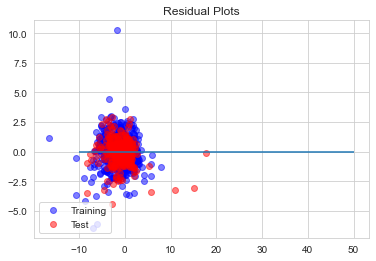

In [156]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [177]:
pred_train

array([ 1.46783351, -2.16482059, -1.7258899 , ...,  0.22206211,
       -1.72200797,  0.71871362])

In [174]:
lreg.predict(X_train).shape

(1448,)

In [176]:
lreg.DataFrame(X_train)

AttributeError: 'LinearRegression' object has no attribute 'DataFrame'